In [1]:
#### Pandas is for using data structures
import pandas as pd
# statsmodels contain modules for regression and time series analysis
import statsmodels.api as sm
# numpy is for numerical computing of array and matrix
import numpy as np
# Matplotlib, Seaborn: plotting package
import matplotlib.pyplot as plt
import seaborn as sns 
# matplotlib Showing the plot right after the current code  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# basic statistics package
import scipy.stats as stats

import datetime


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# functions from last lab
def four_in_one(dataframe,model):
    fitted_y = model.fittedvalues
    studentized_residuals = model.get_influence().resid_studentized_internal
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot(221)
    QQ=stats.probplot(studentized_residuals, dist="norm", plot=plt)
    ax1.set_title('Normal Q-Q')
    ax1.set_xlabel('Normal Quantiles')
    ax1.set_ylabel('Studentized Residuals');
    
    # annotations for the top 3 residulas (if their absolute values are larger than 2)
    stdRes_id = np.flip(np.argsort(np.abs(studentized_residuals)), 0)
    if abs(stdRes_id[0])>2:
        stdRes_top_3_id = stdRes_id[:3]
        abs_norm_resid = np.flip(np.argsort(np.abs(QQ[0][1])), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax1.annotate(stdRes_top_3_id[r],
                                       xy=(QQ[0][0][i],
                                           QQ[0][1][i]));

    ax2 = plt.subplot(222)
    ax2.hist(studentized_residuals)
    ax2.set_xlabel('Studentized Residuals')
    ax2.set_ylabel('Count')
    ax2.set_title('Histogram')

    ax3 = plt.subplot(223)
    t = range(dataframe.shape[0])
    ax3.scatter(t, studentized_residuals)
    ax3.set_xlabel('Observation order')
    ax3.set_ylabel('Studentized Residuals')
    ax3.set_title('Time series plot of studentized residuals')

    ax4 = plt.subplot(224)
    ax4 = sns.residplot(fitted_y, studentized_residuals,
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax4.set_title('Studentized Residuals vs Fitted values')
    ax4.set_xlabel('Fitted values')
    ax4.set_ylabel('Studentized Residuals');
    

def prediction(new_X,model):
    return(model.get_prediction(new_X).summary_frame())

# HR Data

In [3]:
url = 'https://drive.google.com/file/d/1G73rD5uOghIk6H3gZq7bPyOG4Pjprpek/view?usp=sharing'
HRpath = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [5]:
HR = pd.read_csv(HRpath, index_col = 1)
HR.head()

,Employee_Name,MaritalStatusID,GenderID,EmpStatusID,PerfScoreID,Salary,DOB,Sex,DateofHire,DateofTermination,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,1,1,4,62506,7/10/1983,M,7/5/2011,NaN,Active,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,5,3,104437,5/5/1975,M,3/30/2015,6/16/2016,Voluntarily Terminated,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,0,5,3,64955,09/19/88,F,7/5/2011,9/24/2012,Voluntarily Terminated,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,0,1,3,64991,09/27/88,F,1/7/2008,NaN,Active,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",2,0,5,3,50825,9/8/1989,F,7/11/2011,9/6/2016,Voluntarily Terminated,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
HR.DateofTermination[HR.DateofTermination.isnull()] = pd.Timestamp.today()

In [7]:
HR.DateofHire = pd.to_datetime(HR.DateofHire)
HR.DateofTermination = pd.to_datetime(HR.DateofTermination)
HR.head()

,Employee_Name,MaritalStatusID,GenderID,EmpStatusID,PerfScoreID,Salary,DOB,Sex,DateofHire,DateofTermination,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,1,1,4,62506,7/10/1983,M,2011-07-05,2022-04-21 02:15:39.231735,Active,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,5,3,104437,5/5/1975,M,2015-03-30,2016-06-16 00:00:00.000000,Voluntarily Terminated,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,0,5,3,64955,09/19/88,F,2011-07-05,2012-09-24 00:00:00.000000,Voluntarily Terminated,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,0,1,3,64991,09/27/88,F,2008-01-07,2022-04-21 02:15:39.231735,Active,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",2,0,5,3,50825,9/8/1989,F,2011-07-11,2016-09-06 00:00:00.000000,Voluntarily Terminated,Fully Meets,5.00,4,0,2/1/2016,0,2


In [8]:
HR['WorkingPeriod'] =  (HR.DateofTermination - HR.DateofHire).dt.days
HR.head()

,Employee_Name,MaritalStatusID,GenderID,EmpStatusID,PerfScoreID,Salary,DOB,Sex,DateofHire,DateofTermination,EmploymentStatus,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,WorkingPeriod
EmpID,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,1,1,4,62506,7/10/1983,M,2011-07-05,2022-04-21 02:15:39.231735,Active,Exceeds,4.60,5,0,1/17/2019,0,1,3943
10084,"Ait Sidi, Karthikeyan",1,1,5,3,104437,5/5/1975,M,2015-03-30,2016-06-16 00:00:00.000000,Voluntarily Terminated,Fully Meets,4.96,3,6,2/24/2016,0,17,444
10196,"Akinkuolie, Sarah",1,0,5,3,64955,09/19/88,F,2011-07-05,2012-09-24 00:00:00.000000,Voluntarily Terminated,Fully Meets,3.02,3,0,5/15/2012,0,3,447
10088,"Alagbe,Trina",1,0,1,3,64991,09/27/88,F,2008-01-07,2022-04-21 02:15:39.231735,Active,Fully Meets,4.84,5,0,1/3/2019,0,15,5218
10069,"Anderson, Carol",2,0,5,3,50825,9/8/1989,F,2011-07-11,2016-09-06 00:00:00.000000,Voluntarily Terminated,Fully Meets,5.00,4,0,2/1/2016,0,2,1884


In [9]:
HR.columns

Index(['Employee_Name', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'PerfScoreID', 'Salary', 'DOB', 'Sex', 'DateofHire',
       'DateofTermination', 'EmploymentStatus', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences',
       'WorkingPeriod'],
      dtype='object')

In [10]:
Staff = HR[HR.EmploymentStatus == "Active"]

In [11]:
data = Staff[['Employee_Name', "GenderID",'DaysLateLast30','Salary', 'Absences','WorkingPeriod','PerfScoreID','EngagementSurvey']]
data.head()

,Employee_Name,GenderID,DaysLateLast30,Salary,Absences,WorkingPeriod,PerfScoreID,EngagementSurvey
EmpID,,,,,,,,
10026,"Adinolfi, Wilson K",1,0,62506,1,3943,4,4.60
10088,"Alagbe,Trina",0,0,64991,15,5218,3,4.84
10002,"Anderson, Linda",0,0,57568,15,3755,4,5.00
10194,"Andreola, Colby",0,0,95660,19,2719,3,3.04
10062,"Athwal, Sam",1,0,59365,19,3125,3,5.00


In [ ]:
data.columns

Index(['Employee_Name', 'GenderID', 'DaysLateLast30', 'Salary', 'Absences',
       'WorkingPeriod', 'PerfScoreID', 'EngagementSurvey'],
      dtype='object')

In [12]:
# Simple regression
Y = data["EngagementSurvey"]
X = data["Salary"]

SLR1 = sm.OLS(Y, sm.add_constant(X)).fit()
print(SLR1.summary())

                            OLS Regression Results                            
Dep. Variable:       EngagementSurvey   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6986
Date:                Thu, 21 Apr 2022   Prob (F-statistic):              0.404
Time:                        02:15:53   Log-Likelihood:                -241.80
No. Observations:                 207   AIC:                             487.6
Df Residuals:                     205   BIC:                             494.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0038      0.149     26.852      0.0

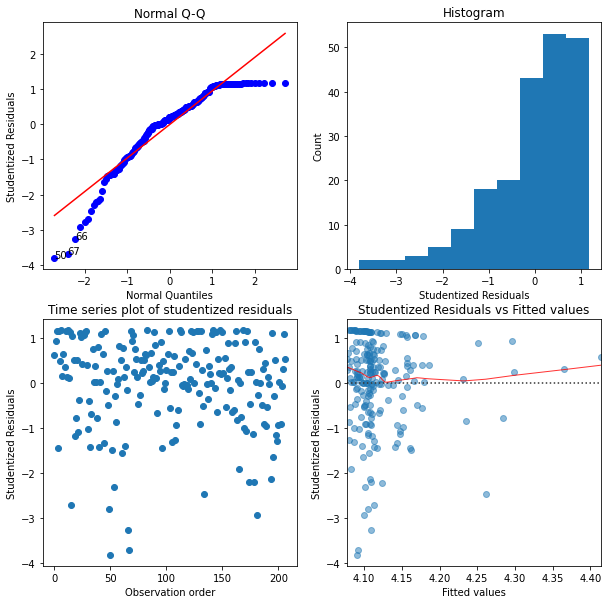

In [ ]:
four_in_one(data,SLR1)
plt.savefig("Residual_Plot_SLR1")

In [ ]:
# Multiple Regression
Y = data["EngagementSurvey"]
X = data.drop(columns = ["Employee_Name", "EngagementSurvey"])

MLR = sm.OLS(Y, sm.add_constant(X)).fit()
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:       EngagementSurvey   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     21.57
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.73e-19
Time:                        17:05:55   Log-Likelihood:                -190.50
No. Observations:                 207   AIC:                             395.0
Df Residuals:                     200   BIC:                             418.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2644      0.369      8.

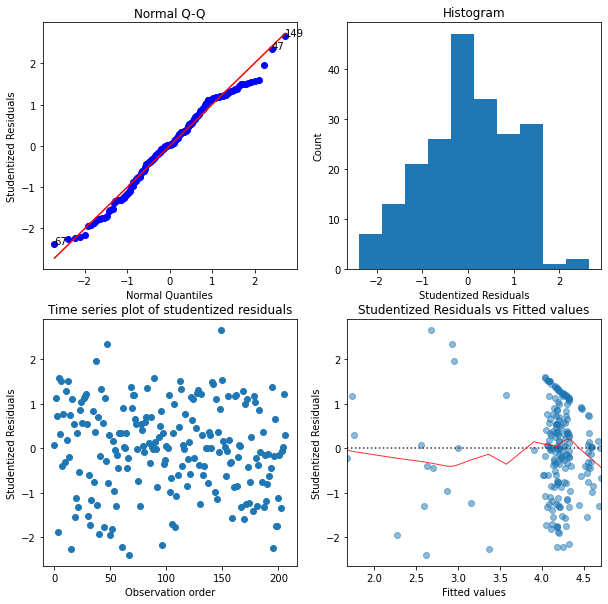

In [ ]:
four_in_one(data, MLR)